# Ejercicio 4

In [76]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = '../Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### Librerias

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron
from matplotlib import pylab as plt



### Consigna

Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es 
el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes atendidos 
previamente. Las variables relevadas son las siguientes:
- Age: Edad
- Sex: Sexo
-  BP (Blood Pressure): Presión sanguínea.
-  Cholesterol: nivel de colesterol.
-  Na: Nivel de sodio en la sangre.
- K: Nivel de potasio en la sangre.
- Class: Fármaco suministrado. Cada paciente 
ha sido medicado con un único fármaco de 5 
posibles: DrugA, DrugB, DrugC, DrugX, DrugY

In [78]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'Drug5.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe

display(df)

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


### Inciso a

a) Utilice el archivo Drug_train.csv para entrenar un perceptrón que sea capaz de predecir si el tipo de 
fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual (suministro de 
DrugY) o no. 

- HABITUAL --> DrugY
- no habitual

NUMERIZACION

In [79]:
#-- ordinales a numericos ---
mapeo = {'Sex': {'F':1, 'M':0},
          'BP':{'HIGH':2, 'NORMAL':1, 'LOW':0},
          'Cholesterol':{'NORMAL':0, 'HIGH':1}}

df.replace(mapeo, inplace=True)
df

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,1,2,1,0.792535,0.031258,drugY
1,47,0,0,1,0.739309,0.056468,drugC
2,47,0,0,1,0.697269,0.068944,drugC
3,28,1,1,1,0.563682,0.072289,drugX
4,61,1,0,1,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,1,0,1,0.848774,0.073380,drugC
196,16,0,0,1,0.743021,0.061886,drugC
197,52,0,1,1,0.549945,0.055581,drugX
198,23,0,1,0,0.784520,0.055959,drugX


VARIABLE X VS Y

In [80]:
#se crea arreglo numpy array
X = np.array(df.iloc[:,:-1])
Y = np.array((df['Drug'] ==  'drugY') * 1) #si el valor es drugY se deja en 1, sino 0

CONJUNTO DE ENTRENAMIENTO Y DE TESTEO

In [81]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=42)

NORMALIZACION

In [82]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    #normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

ENTRENAMIENTO DEL PERCEPTRON

In [83]:
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn.fit(X_train, y_train)



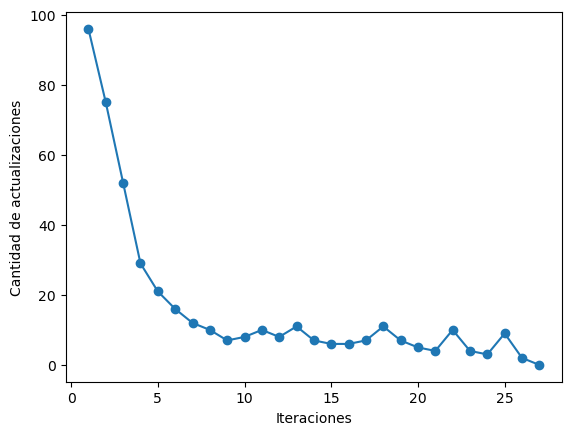

In [84]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

Este grafico muestra el numero de errore4s cometidos durante cada iteracion.
- ppn.errors_: Es una lista o un array que contiene el número de actualizaciones realizadas (es decir, las correcciones de peso) en cada iteración del algoritmo, lo que indica que el modelo cometió errores en esas iteraciones.

### Inciso b

b)  Luego utilice el archivo Drug_test.csv para medir la calidad del modelo.

In [85]:
Y_pred = ppn.predict(X_test)

aciertos = sum(Y_pred == y_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_pred == y_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))

aciertos =  60
% de aciertos = 100.00 %


### Inciso c

c) Resuelva el problema:
- numerizando los atributos ordinales utilizando dos representaciones diferentes: como entero único 
y de manera binaria (dummy).
- Normalizando de diferentes formas: Sin normalizar, normalización lineal, normalización con media y 
desvío

NUMERIZACION

Numerizando los atributos ordinales: entero unico, de manera binaria, como seria? 

hacerlo con get dummies, cuandoes binario, te agrega una columna por cada valor (1,2,3) te hace tres columnas por separado y le pone un 1 a lo que es true

NORMALIZACION

Normalizando con minmaxscaler o con standard scaler, las metricas dan iguales